In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from functools import reduce

# Gathering Data

In [2]:
# read twitter-archive-enhanced.csv file
twitter_archive =pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# read image-predictions.tsv file
image_predictions= pd.read_csv('image-predictions.tsv',sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
# read json file
tweet = pd.read_json('tweet-json.txt', lines = True)
tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# Assessing Data

### twitter_archive :

In [5]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

There is a lote of missing data in this columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp ,And a little in expanded_urls column
<br>
The timestamp and retweeted_status_timestamp should be datetime

In [6]:
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [7]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

the data here should be extracted from the html code, be like (iphone , vine , twitterWeb ,TweetDeck)  

In [8]:
twitter_archive.tweet_id.duplicated().sum()

0

In [9]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Cupid        1
Jerome       1
Milky        1
Rupert       1
Vinnie       1
Name: name, Length: 957, dtype: int64

In [10]:
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [11]:
# to see names that start with a lowercase letter
list = []
for x in twitter_archive.name:
    list.append(x)
    
list = np.unique(list)    
for v in list:
    if v.islower():
        print(v)
    



a
actually
all
an
by
getting
his
incredibly
infuriating
just
life
light
mad
my
not
officially
old
one
quite
space
such
the
this
unacceptable
very


there are some dogs that have 'a' , 'the' as a name
<br> And 'None' should be 'NaN' 

In [12]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [14]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [15]:
twitter_archive.puppo.value_counts()


None     2326
puppo      30
Name: puppo, dtype: int64

In [16]:
twitter_archive[(twitter_archive['doggo']== 'None') & (twitter_archive['floofer']== 'None') & (twitter_archive['pupper']== 'None') & (twitter_archive['puppo']== 'None')]['tweet_id'].count()


1976

1976 are not on any dog "stage", and we can note 1976 + 394 = 2370 is more then our dataset ,That mean there is some dogs in many dog "stage" at the same time

### image_predictions :

In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


p1, p2, and p3 contain underscores instead of spaces

In [20]:
image_predictions.tweet_id.duplicated().sum()

0

In [21]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### tweet :

In [22]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

There is a lot of the variables have missing data

In [23]:
tweet.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [24]:
tweet.favorite_count.mean()

8080.968564146135

In [25]:
tweet.favorite_count.describe()

count      2354.000000
mean       8080.968564
std       11814.771334
min           0.000000
25%        1415.000000
50%        3603.500000
75%       10122.250000
max      132810.000000
Name: favorite_count, dtype: float64

In [26]:
tweet.retweet_count.mean()

3164.7973661852166

In [27]:
tweet.favorite_count.describe()

count      2354.000000
mean       8080.968564
std       11814.771334
min           0.000000
25%        1415.000000
50%        3603.500000
75%       10122.250000
max      132810.000000
Name: favorite_count, dtype: float64

## Quality Issues

**twitter_archive**

- Missing data in columns(expanded_urls).
- Delete unwonted columns (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp).
- The timestamp should be a datetime.
- Some dogs that have 'a' , 'the' as a name.
- There are some doges have names that start with a lowercase letter.
- There is a 745 missing values in name column referred as 'None'.
- The source column data should be extracted from the html code,like (iphone , vine , twitterWeb ,TweetDeck), Also it's the same source as the tweet.json.
- 1976 are not on any dog "stage", and we can note 1976 + 394 = 2370 is more than our dataset ,that mean there is some dogs in many "stage" at the same time.
- rating_numerator and rating_denominator should be a float.

**image_predictions**
- In p1, p2, and p3 columns it's contained underscores instead of spaces.
- Delete unnecessary column (img_num).

**tweet**
- There is a lot of the variables have missing data should be deleted.





## Tidiness Issues

- In twitter_archive:(dogger, floofer, pupper and puppo)columns relate to the same variable dog "stage".
- In teitter_archive calulate 'rating_numerator' and 'rating_denominator' and save it in one column.
- The tweet.json and image_predictions should be joined to twitter_archive DataFrame since they are having same columns. , And drop unneeded columns

# Cleaning Data

In [28]:
archive_clean = twitter_archive.copy()
images_clean = image_predictions.copy()
tweet_clean = tweet.copy()

### archive_clean

**Define**:
Clean Missing data in expanded_urls

**Code**

In [29]:
archive_clean.expanded_urls.isnull().sum()

59

In [30]:
#Remove expanded_urls NaN value 
archive_clean = archive_clean[archive_clean.expanded_urls.notnull()]

**Test**

In [31]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2297 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2297 non-null   object 
 4   source                      2297 non-null   object 
 5   text                        2297 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2297 non-null   int64  
 11  rating_denominator          2297 non-null   int64  
 12  name                        2297 non-null   object 
 13  doggo                       2297 

**Define**:delete unwonted columns(in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp).

**Test**

In [32]:
# Remove unwonted columns
archive_clean = archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1)

In [33]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2297 non-null   int64 
 1   timestamp           2297 non-null   object
 2   source              2297 non-null   object
 3   text                2297 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2297 non-null   int64 
 6   rating_denominator  2297 non-null   int64 
 7   name                2297 non-null   object
 8   doggo               2297 non-null   object
 9   floofer             2297 non-null   object
 10  pupper              2297 non-null   object
 11  puppo               2297 non-null   object
dtypes: int64(3), object(9)
memory usage: 233.3+ KB


**Define :** Replace timestamp Dtype

**Code**

In [34]:
archive_clean.timestamp =  pd.to_datetime(archive_clean.timestamp, format='%Y-%m-%d %H:%M:%S')

**Test**

In [35]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2297 non-null   int64              
 1   timestamp           2297 non-null   datetime64[ns, UTC]
 2   source              2297 non-null   object             
 3   text                2297 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2297 non-null   int64              
 6   rating_denominator  2297 non-null   int64              
 7   name                2297 non-null   object             
 8   doggo               2297 non-null   object             
 9   floofer             2297 non-null   object             
 10  pupper              2297 non-null   object             
 11  puppo               2297 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

**Define**: 
- Change the name of dogs like 'a','the' to 'Nan'
- Replace names that start with a lowercase letter to uppercase

**Code**

In [36]:
list = ['a' ,'actually', 'all' ,'an' ,'by' ,'getting', 'his', 'incredibly', 'infuriating', 'just' ,'life' ,'light' ,'mad', 'my', 'not', 'officially' ,'old' ,'one', 'quite' ,'space' ,'such' ,'the' ,'this' ,'unacceptable' ,'very']
for x in archive_clean.name:
    if x in list:
        archive_clean.name.replace(x,'None',inplace = True)

In [37]:
archive_clean.name = archive_clean.name.str.capitalize()

**Test**

In [38]:
list = []
for x in archive_clean.name:
    list.append(x)
    
list = np.unique(list)  
for v in list:
    if v.islower():
        print(v)

**Define:** Replace all 'None' values in name column to NaN , and drop it.

**Code**

In [39]:
archive_clean.name.replace('None',np.nan,inplace = True)
archive_clean = archive_clean.dropna()


**Test**

In [40]:
archive_clean.name[archive_clean.name == 'None'].count()

0

In [41]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1502 non-null   int64              
 1   timestamp           1502 non-null   datetime64[ns, UTC]
 2   source              1502 non-null   object             
 3   text                1502 non-null   object             
 4   expanded_urls       1502 non-null   object             
 5   rating_numerator    1502 non-null   int64              
 6   rating_denominator  1502 non-null   int64              
 7   name                1502 non-null   object             
 8   doggo               1502 non-null   object             
 9   floofer             1502 non-null   object             
 10  pupper              1502 non-null   object             
 11  puppo               1502 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

**Define:** extract data from the html code,like (iPhone , Vine , Twitter Web Client ,TweetDeck).

**Code**

In [42]:
archive_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [43]:
list = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'iPhone',
        '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
        '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine',
        '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'TweetDeck'}
archive_clean.source.replace(list, inplace=True)

**Test**

In [44]:
archive_clean.source.value_counts()

iPhone                1436
Vine                    41
Twitter Web Client      16
TweetDeck                9
Name: source, dtype: int64

**Define :** 
- (There is some dogs in many "stage" at the same time)for fixed this should create new column and make unique value for each dog.

**Code**

In [45]:
archive_clean['stages'] = archive_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

In [46]:
archive_clean.stages.unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNonepupperNone'],
      dtype=object)

In [47]:
list = {'NoneNoneNoneNone': 'None','doggoNoneNoneNone': 'doggo',
        'NoneNoneNonepuppo': 'puppo','NoneNonepupperNone': 'pupper',
        'NoneflooferNoneNone': 'floofer','doggoNoneNonepuppo': 'doggo, puppo',
        'doggoflooferNoneNone': 'doggo ,floofer','doggoNonepupperNone': 'doggo,pupper',}
archive_clean.stages.replace(list, inplace=True)

In [48]:
archive_clean.drop(['doggo','floofer', 'pupper','puppo'], axis=1, inplace= True)

**Test**

In [49]:
archive_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


**Define** :
- calulate 'rating_numerator' and 'rating_denominator' and save it in one column
- And replace Dtype to Float

**Code**

In [50]:
archive_clean.rating_numerator=archive_clean.rating_numerator.astype(float)
archive_clean.rating_denominator=archive_clean.rating_denominator.astype(float)

In [51]:
archive_clean['rating'] = archive_clean.rating_numerator / archive_clean.rating_denominator

In [52]:
archive_clean.drop(columns=['rating_numerator','rating_denominator'], inplace=True)

**Test**

In [53]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       1502 non-null   int64              
 1   timestamp      1502 non-null   datetime64[ns, UTC]
 2   source         1502 non-null   object             
 3   text           1502 non-null   object             
 4   expanded_urls  1502 non-null   object             
 5   name           1502 non-null   object             
 6   stages         1502 non-null   object             
 7   rating         1502 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(5)
memory usage: 105.6+ KB


### images_clean

**Define:** 

- Delete unnecessary column (img_num)
- In p1, p2, and p3 columns replce the underscores to spaces

**Code**

In [54]:
images_clean.drop(columns=['img_num'], inplace=True)

In [55]:
images_clean.p1 = images_clean.p1.str.replace('_',' ')
images_clean.p2 = images_clean.p2.str.replace('_',' ')
images_clean.p3 = images_clean.p3.str.replace('_',' ')

**Test**

In [56]:
images_clean.head(3)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### tweet_clean
**Define:** 
- extract only three columns (id,favorite_count,retweet_count)
- change 'id'column name to 'tweet_id'

**Code**

In [57]:
tweet_clean = tweet_clean[['id', 'favorite_count', 'retweet_count']]

In [58]:
tweet_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

**Test**

In [59]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [60]:
tweet_clean.head(3)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328


- The tweet.json and image_predictions should be joined to twitter_archive DataFrame.

In [61]:
x = [archive_clean, images_clean,tweet_clean]
df_master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), x)

# Storing

In [62]:
df_master.to_csv('twitter_archive_master.csv', index=False)

# Analyzing, and Visualizing Data

In [63]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1396 entries, 0 to 1395
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1396 non-null   int64              
 1   timestamp       1396 non-null   datetime64[ns, UTC]
 2   source          1396 non-null   object             
 3   text            1396 non-null   object             
 4   expanded_urls   1396 non-null   object             
 5   name            1396 non-null   object             
 6   stages          1396 non-null   object             
 7   rating          1396 non-null   float64            
 8   jpg_url         1396 non-null   object             
 9   p1              1396 non-null   object             
 10  p1_conf         1396 non-null   float64            
 11  p1_dog          1396 non-null   bool               
 12  p2              1396 non-null   object             
 13  p2_conf         1396 non-null   f

In [64]:
df_master.head(3)

,tweet_id,timestamp,source,text,expanded_urls,name,stages,rating,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328


In [65]:
df_master.describe()

,tweet_id,rating,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.396000e+03,1396.000000,1396.000000,1.396000e+03,1.396000e+03,1396.000000,1396.000000
mean,7.466963e+17,1.207998,0.600560,1.341934e-01,6.065500e-02,9098.351003,2972.467049
std,6.873174e+16,4.731996,0.273303,1.008900e-01,5.166124e-02,11609.852184,4445.893624
min,6.664188e+17,0.200000,0.044333,1.011300e-08,1.740170e-10,0.000000,23.000000
25%,6.808763e+17,1.000000,0.368408,5.187413e-02,1.545355e-02,2123.250000,733.500000
50%,7.305003e+17,1.100000,0.599557,1.196160e-01,4.922740e-02,4556.000000,1646.000000
75%,8.048560e+17,1.200000,0.865439,1.978287e-01,9.443828e-02,11975.000000,3637.500000
max,8.924206e+17,177.600000,1.000000,4.880140e-01,2.734190e-01,107956.000000,56625.000000


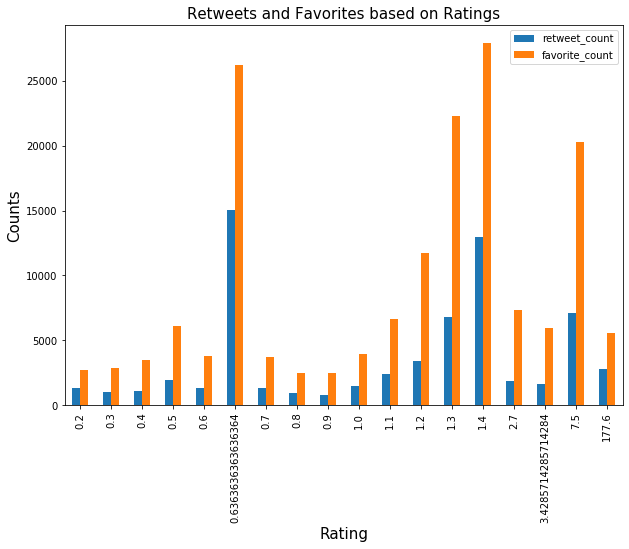

In [66]:
df_master.groupby('rating')[['retweet_count','favorite_count']].mean().plot(kind='bar', figsize=(10,7))
plt.title('Retweets and Favorites based on Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Counts', fontsize=15);

From the plot above we can say that most users prefer to a favorite rather than retweet and also, we can say that there is a direct relationship between favorite and retweeting , All favorite tweets are the most retweet.

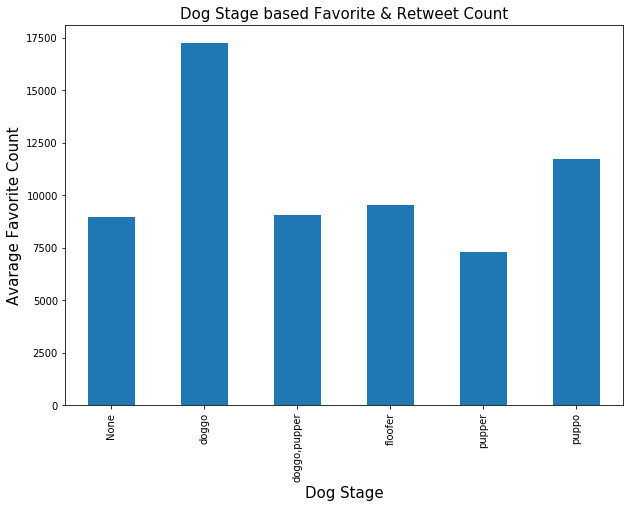

In [67]:
df_master.groupby('stages')['favorite_count'].mean().plot(kind='bar', figsize=(10,7))
plt.title('Dog Stage based Favorite & Retweet Count', fontsize=15)
plt.xlabel('Dog Stage', fontsize=15)
plt.ylabel('Avarage Favorite Count', fontsize=15);

According to the analysis above Doggo is Most favorite stage, followed by Puppo.

In [68]:
df_master.name.value_counts()

Charlie    11
Lucy       10
Tucker     10
Penny      10
Oliver     10
           ..
Bebe        1
Jerome      1
Milky       1
Rupert      1
Vinnie      1
Name: name, Length: 913, dtype: int64

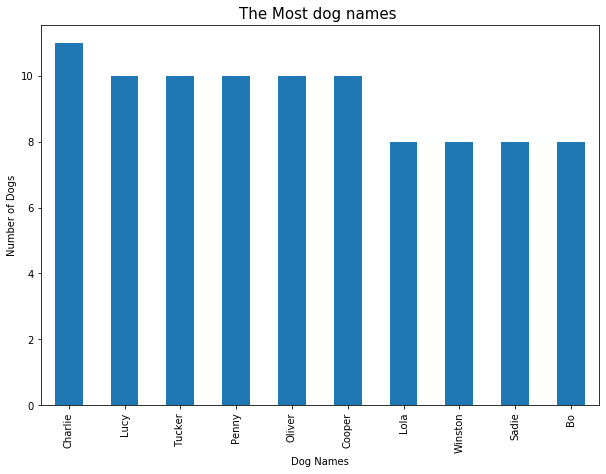

In [69]:
df_master.name.value_counts()[0:10].plot(kind = 'bar', figsize=(10,7))
plt.title('The Most dog names ', size=15)
plt.xlabel('Dog Names')
plt.ylabel('Number of Dogs');

The most popular name is Charlie followed then Lucy ,Tucker ,Penny ,Cooper ,Oliver.

In [70]:
df_master.source.value_counts()


iPhone                1371
Twitter Web Client      16
TweetDeck                9
Name: source, dtype: int64

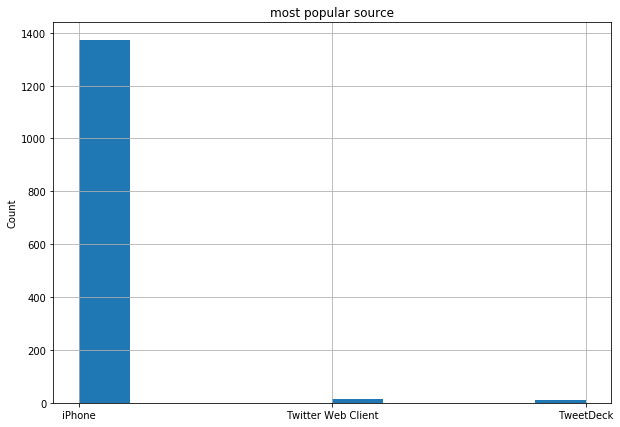

In [71]:
df_master.source.hist(figsize=(10,7))
plt.title('most popular source')
plt.ylabel('Count');


We can notice that the most famous one is Twitter iPhone, then Twitter Web Client and TweetDeck.